In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns;
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
df=pd.read_csv("JobMarketData.csv")

In [3]:
df.head(3)

Role                  Companies            Location  \
0             Data Scientist                      2Coms           New Delhi   
1  Machine Learning Engineer                      2Coms              Mumbai   
2             Data Scientist  2Coms Consulting Pvt Ltd.  Chennai, Bengaluru   

  Experience                                             Skills Company Size  \
0  2 - 7 Yrs  DataModeling\nEnterpriseApplications\nAnalytic...          838   
1    0-5 Yrs  Python\nComputerVision\nMachineLearning\nR\nBu...         4000   
2   6-11 Yrs  Machine Learning Code DataScience R Data Model...        10000   

  Eligibility Criteria Enrollment Type           Salary Min Salary Max Salary  \
0               B.Tech       Freelance  1000000-2000000    1000000    2000000   
1                   UG       Full Time  1800000-3300000    1800000    3300000   
2                  Phd       Full Time    160000-185000     160000     185000   

  Min Experience  
0              2  
1              0  
2              6

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Role                  388 non-null    object
 1   Companies             388 non-null    object
 2   Location              388 non-null    object
 3   Experience            388 non-null    object
 4   Skills                388 non-null    object
 5   Company Size          373 non-null    object
 6   Eligibility Criteria  388 non-null    object
 7   Enrollment Type       388 non-null    object
 8   Salary                326 non-null    object
 9   Min Salary            388 non-null    object
 10  Max Salary            388 non-null    object
 11  Min Experience        388 non-null    object
dtypes: object(12)
memory usage: 36.5+ KB


In [5]:
df.shape

(388, 12)

In [6]:
df.isnull().sum()

Role                     0
Companies                0
Location                 0
Experience               0
Skills                   0
Company Size            15
Eligibility Criteria     0
Enrollment Type          0
Salary                  62
Min Salary               0
Max Salary               0
Min Experience           0
dtype: int64

In [7]:
df.drop('Min Experience',inplace=True, axis=1)

In [8]:
df.isnull().sum()

Role                     0
Companies                0
Location                 0
Experience               0
Skills                   0
Company Size            15
Eligibility Criteria     0
Enrollment Type          0
Salary                  62
Min Salary               0
Max Salary               0
dtype: int64

In [9]:
df.head(3)

Role                  Companies            Location  \
0             Data Scientist                      2Coms           New Delhi   
1  Machine Learning Engineer                      2Coms              Mumbai   
2             Data Scientist  2Coms Consulting Pvt Ltd.  Chennai, Bengaluru   

  Experience                                             Skills Company Size  \
0  2 - 7 Yrs  DataModeling\nEnterpriseApplications\nAnalytic...          838   
1    0-5 Yrs  Python\nComputerVision\nMachineLearning\nR\nBu...         4000   
2   6-11 Yrs  Machine Learning Code DataScience R Data Model...        10000   

  Eligibility Criteria Enrollment Type           Salary Min Salary Max Salary  
0               B.Tech       Freelance  1000000-2000000    1000000    2000000  
1                   UG       Full Time  1800000-3300000    1800000    3300000  
2                  Phd       Full Time    160000-185000     160000     185000

In [10]:
df['Company Size'].fillna('0',inplace=True)
df['Salary'].fillna('0',inplace=True)
df.replace(['#VALUE!'],['0'],inplace=True)

In [11]:
df['Max Salary']=df['Max Salary'].astype('int64')
df['Min Salary']=df['Min Salary'].astype('int64')

In [12]:
experience_split = df['Experience'].str[0:-3].str.split('-', expand=True)
experience_split.head()

0    1
0  2    7 
1   0   5 
2   6  11 
3   3   8 
4   8  13

In [13]:
#remove space in left and right 
experience_split[0] =  experience_split[0].str.strip()
#remove comma 
experience_split[0] = experience_split[0].str.replace('Yr', '')

#remove all character in two condition
# 1 remove if only character
# 2 if start in number remove after all character
experience_split[0] = experience_split[0].str.replace(r'Yr', '')
#display 
experience_split[0].head()

0    2
1    0
2    6
3    3
4    8
Name: 0, dtype: object

In [14]:
#remove space in left and right 
experience_split[1] =  experience_split[1].str.strip()
#remove comma 
experience_split[1] = experience_split[1].str.replace('Yr', '')

#remove all character in two condition
# 1 remove if only character
# 2 if start in number remove after all character
experience_split[1] = experience_split[1].str.replace(r'Yr', '')
#display 
experience_split[1].head()

0     7
1     5
2    11
3     8
4    13
Name: 1, dtype: object

In [15]:
experience_split[0] = pd.to_numeric(experience_split[0], errors='coerce')
experience_split[1] = pd.to_numeric(experience_split[1], errors='coerce')

In [16]:
experience=pd.concat([experience_split[0], experience_split[1]], axis=1, sort=False)

In [17]:
experience.rename(columns={0:'min_experience', 1:'max_experience'}, inplace=True)
experience.head()

min_experience  max_experience
0             2.0             7.0
1             0.0             5.0
2             6.0            11.0
3             3.0             8.0
4             8.0            13.0

In [18]:
df['min_experience']=experience_split[0]
df['max_experience']=experience_split[1]

In [19]:
df['avg_pay']=(df['Min Salary'].values + df['Max Salary'].values)/2
df['avg_experience']=(df['min_experience'].values + df['max_experience'].values)/2

In [20]:
df.head(3)

Role                  Companies            Location  \
0             Data Scientist                      2Coms           New Delhi   
1  Machine Learning Engineer                      2Coms              Mumbai   
2             Data Scientist  2Coms Consulting Pvt Ltd.  Chennai, Bengaluru   

  Experience                                             Skills Company Size  \
0  2 - 7 Yrs  DataModeling\nEnterpriseApplications\nAnalytic...          838   
1    0-5 Yrs  Python\nComputerVision\nMachineLearning\nR\nBu...         4000   
2   6-11 Yrs  Machine Learning Code DataScience R Data Model...        10000   

  Eligibility Criteria Enrollment Type           Salary  Min Salary  \
0               B.Tech       Freelance  1000000-2000000     1000000   
1                   UG       Full Time  1800000-3300000     1800000   
2                  Phd       Full Time    160000-185000      160000   

   Max Salary  min_experience  max_experience    avg_pay  avg_experience  
0     2000000             2.0             7.0  1500000.0             4.5  
1     3300000             0.0             5.0  2550000.0             2.5  
2      185000             6.0            11.0   172500.0             8.5

<AxesSubplot:xlabel='min_experience', ylabel='Min Salary'>

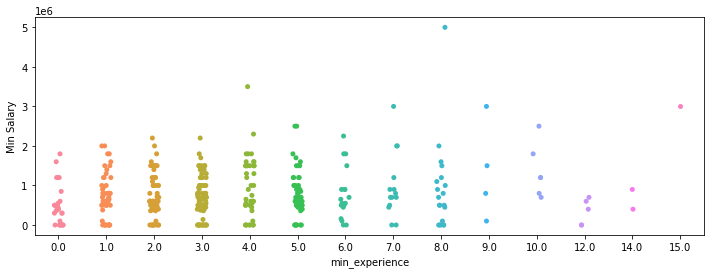

In [21]:
f,ax=plt.subplots(figsize=(12,4))

sns.stripplot(x='min_experience', y='Min Salary', data=df, jitter=True)

<AxesSubplot:xlabel='min_experience', ylabel='Min Salary'>

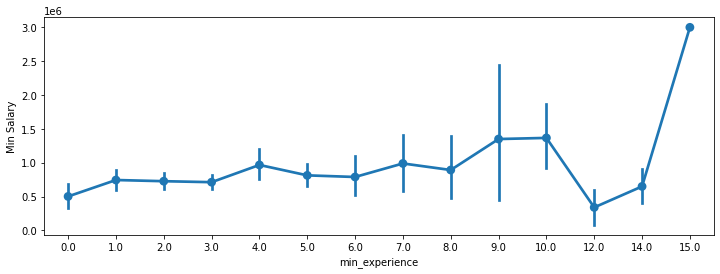

In [22]:
f,ax=plt.subplots(figsize=(12,4))
sns.pointplot(x='min_experience', y='Min Salary', data=df)

<AxesSubplot:xlabel='max_experience', ylabel='Max Salary'>

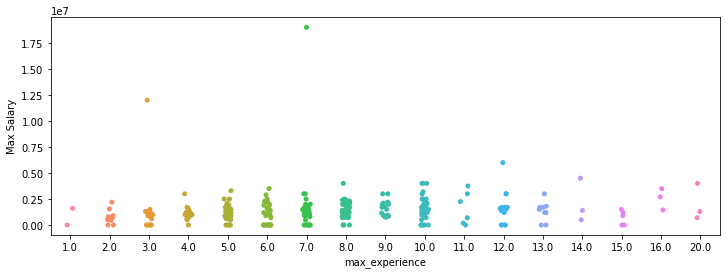

In [23]:
f,ax=plt.subplots(figsize=(12,4))
sns.stripplot(x='max_experience', y='Max Salary', data=df, jitter=True)

<AxesSubplot:xlabel='max_experience', ylabel='Max Salary'>

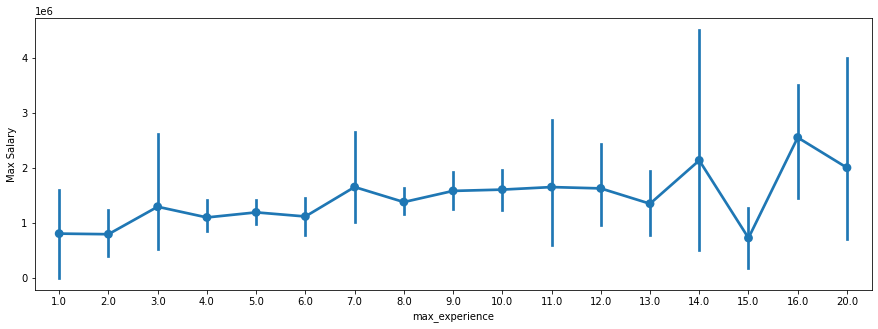

In [24]:
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='max_experience', y='Max Salary', data=df)

In [25]:
import plotly.graph_objs as go

dfr = df['Role'].value_counts().head(20).sort_values(ascending = True).reset_index()
dfl = df['Location'].value_counts().head(20).sort_values(ascending = True).reset_index()
dfc = df['Companies'].value_counts().head(20).sort_values(ascending = True).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x = dfr['Role'],
                     y = dfr['index'],
                     orientation='h',
                     name = 'Position',
                     marker = dict(color = 'LightCoral')))

fig.add_trace(go.Bar(x = dfl['Location'],
                     y = dfl['index'],
                     orientation='h',
                     name = 'Location',
                     marker = dict(color = 'CadetBlue')))

fig.add_trace(go.Bar(x = dfc['Companies'],
                     y = dfc['index'],
                     orientation='h',
                     name = 'Company',
                     marker = dict(color = 'SteelBlue')))

fig.update_layout( 
    updatemenus=[ 
        dict( 
            type = "buttons",
            direction="left", 
            pad={"r": 10, "t": 10},
            showactive=True, 
            x=0.16, 
            xanchor="left",
            y=1.12, 
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([ 
                dict(label="All", 
                     method="update", 
                     args=[ {"visible": [True, True, True]}, 
                            {'showlegend' : True} 
                        ]),
                dict(label="Position", 
                     method="update", 
                     args=[ {"visible": [True, False, False]}, 
                            {'showlegend' : True} 
                        ]), 
                dict(label='Location', 
                     method="update", 
                     args=[ {"visible": [False, True, False]}, 
                            {'showlegend' : True} 
                     ]), 
                dict(label='Company', 
                     method="update", 
                     args=[ {"visible": [False, False, True]}, 
                            {'showlegend' : True}]),
            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=0, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'DarkSlateBlue'))])

fig.update_layout(title ="Top 10 Positions, Locations and Companies",
                  title_x = 0.5,
                  title_font = dict(size = 20, color = 'MidnightBlue'))

fig.show()

In [81]:
dfd1 = df[df['Role']== 'Data Scientist']
dfd2 = df[df['Role']== 'Machine Learning Engineer']
dfd3 = df[df['Role']== 'Data Engineer']

redf1 = dfd1['Eligibility Criteria'].value_counts()[:15].reset_index()
redf2 = dfd2['Eligibility Criteria'].value_counts()[:15].reset_index()
redf3 = dfd3['Eligibility Criteria'].value_counts()[:15].reset_index()



fig = go.Figure()

fig.add_trace(go.Bar(x = redf1["index"],
                     y = redf1["Eligibility Criteria"],
                     marker = dict(color = 'LightCoral'),
                     name = 'Data Scientist'))

fig.add_trace(go.Bar(x = redf2['index'],
                     y = redf2['Eligibility Criteria'],
                     name = 'Machine Learning Engineer',
                     marker = dict(color = 'CadetBlue')))

fig.add_trace(go.Bar(x = redf3['index'],
                     y = redf3['Eligibility Criteria'],
                     name = 'Data Engineer',
                     marker = dict(color = 'SteelBlue')))


fig.update_layout( 
    updatemenus=[ 
        dict( 
            direction="down", 
            pad={"r": 10, "t": 10},
            showactive=True, 
            x=0.13, 
            xanchor="left",
            y=1.12, 
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([ 
                dict(label="All", 
                     method="update", 
                     args=[ {"visible": [True, True, True,True]}, 
                            {'showlegend' : True} 
                        ]),
                dict(label="Data Scientist", 
                     method="update", 
                     args=[ {"visible": [True, False, False,False]}, 
                            {'showlegend' : True} 
                        ]), 
                dict(label='Machine Learning Engineer', 
                     method="update", 
                     args=[ {"visible": [False, True, False,False]}, 
                            {'showlegend' : True} 
                     ]), 
                dict(label='Data Engineer', 
                     method="update", 
                     args=[ {"visible": [False, False, True,False]}, 
                            {'showlegend' : True} 
                        ]),  
                
            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=0, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'DarkSlateBlue'))])

fig.update_layout(title ="The distribution of states by four Positions",
                  title_x = 0.5,
                  title_font = dict(size = 20, color = 'MidnightBlue'))

fig.show()

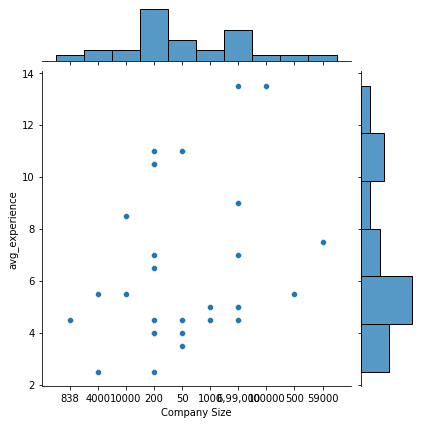

In [27]:
sns.jointplot(x= 'Company Size',y= 'avg_experience', data =df.head(30))

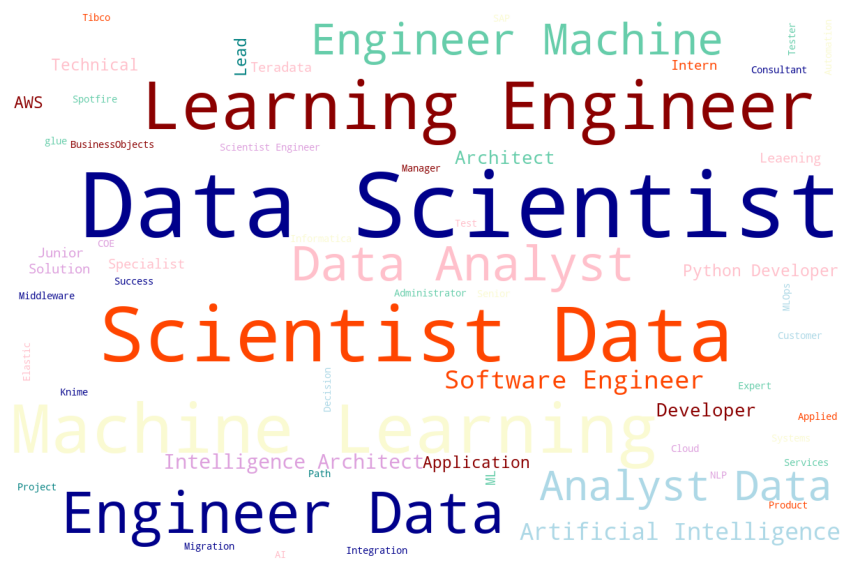

In [28]:
from wordcloud import WordCloud
from matplotlib import colors 

color_list=  ['DarkBlue','Teal','LightBlue','MediumAquamarine','Plum','OrangeRed','DarkRed','Pink','LightGoldenrodYellow']

colormap = colors.ListedColormap(color_list)

plt.rcParams['figure.figsize'] = (15,15)

wordcloud =  WordCloud(background_color= 'white',
                       width = 1200,height = 800 ,
                       max_words = 120,colormap = colormap ).generate(" ".join(df['Role']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [29]:
df3= df[["Location","Role"]].groupby("Location").count()


In [30]:
df3

Role
Location                               
Ahmedabad                             5
Bengaluru                            98
Bengaluru, Delhi                      1
Bengaluru, Mumbai                     1
Bengaluru,Hyderabad                   1
...                                 ...
Pune,Chennai,Bengaluru                1
Remote                               10
Secunderabad,Hyderabad                1
Thane                                 2
Visakhapatnam,Hyderabad,Bengaluru     1

[84 rows x 1 columns]

In [31]:
df3=df3.sort_values("Role",ascending = False).head(6)

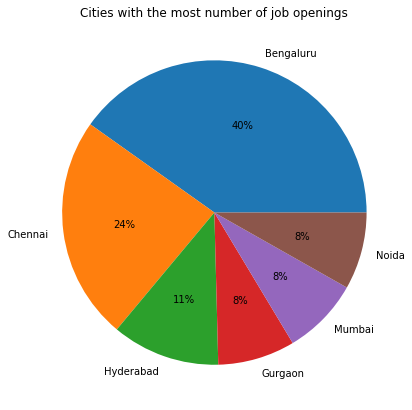

In [32]:
plt.figure(figsize=(10,7))
plt.title('Cities with the most number of job openings')
plt.pie(x=df3.Role,labels=df3.index,autopct='%1.0f%%')
plt.show()

In [33]:
df4= df[["Companies","Role"]].groupby("Companies").count()

In [34]:
df4=df4.sort_values("Role",ascending = False).head(10)
df4

Role
Companies                                               
Analytics Vidhya Educon Pvt. Ltd                      24
Accenture                                              6
Wipro                                                  6
Walmart                                                5
IBM                                                    4
3D India Staffing Research Consulting Pvt Ltd          4
AgNext Technologies ( India's leading Agri Tech...     3
Tech Mahindra                                          3
AICHUNKS Private Limited                               3
Boston Consulting Group                                3

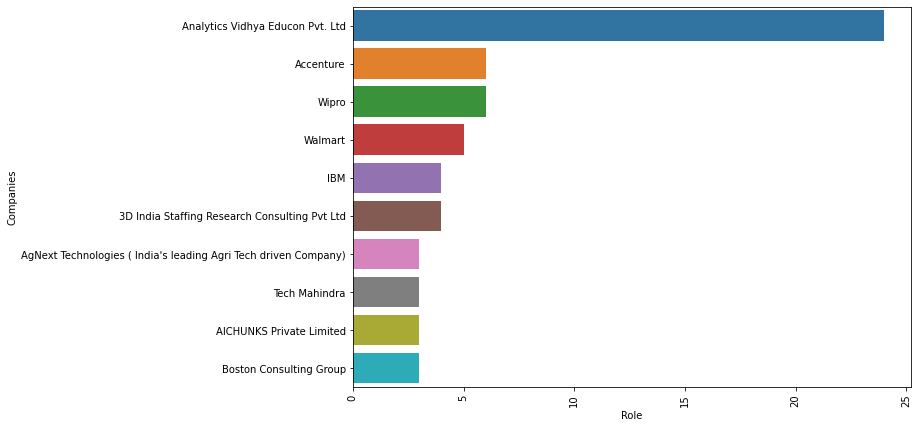

In [35]:
plt.figure(figsize=(10,7))
sns.barplot(y=df4.index,x=df4.Role)
plt.xticks(rotation=90)
plt.show()

In [36]:
a=df[df.Companies=='Analytics Vidhya Educon Pvt. Ltd']
a.Location.value_counts()

Bengaluru    12
Noida         3
Mumbai        3
Pune          3
Chennai       2
Hyderabad     1
Name: Location, dtype: int64

In [37]:
df5= df[["Role","Experience"]].groupby("Experience").count()
df5 = df5.sort_values("Role",ascending = False).head(7)
df5

Role
Experience      
3-8 Yrs       29
5-10 Yrs      23
2-7 Yrs       22
3-6 Yrs       12
2-5 Yrs       12
4-9 Yrs       12
4-8 Yrs       11

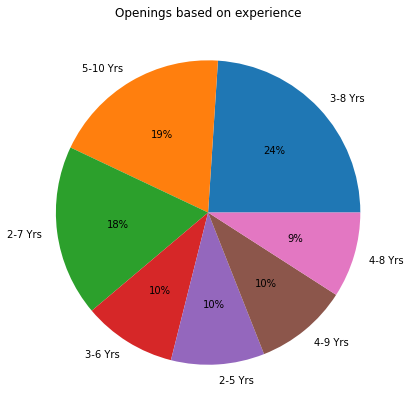

In [38]:
plt.figure(figsize=(10,7))
plt.title('Openings based on experience')
plt.pie(x=df5.Role,labels=df5.index,autopct='%1.0f%%')
plt.show()

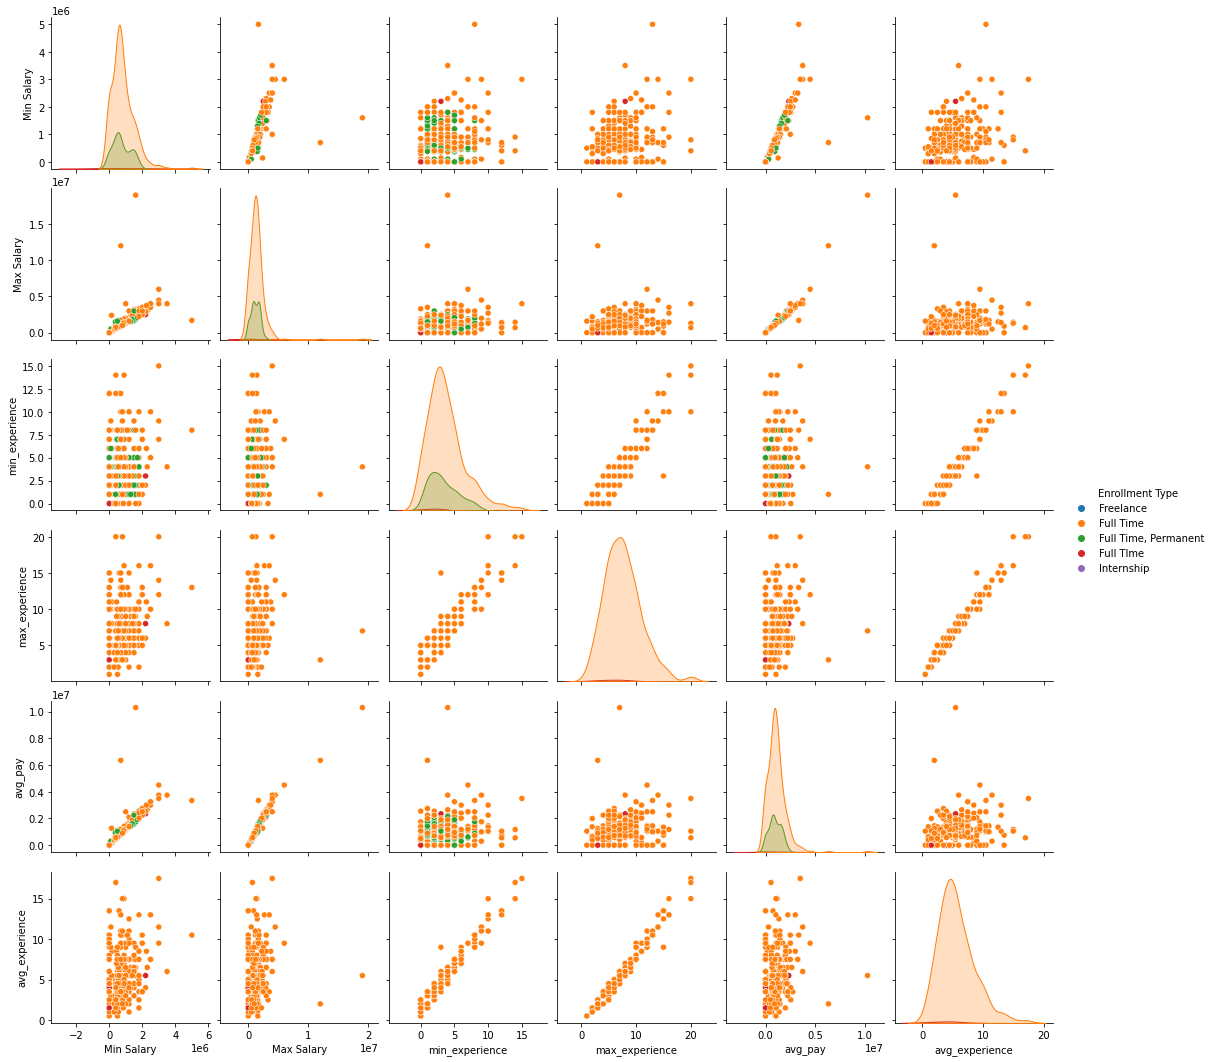

In [39]:
sns.pairplot(df,hue='Enrollment Type') 

In [40]:
data1 = df.copy()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Role                  388 non-null    object 
 1   Companies             388 non-null    object 
 2   Location              388 non-null    object 
 3   Experience            388 non-null    object 
 4   Skills                388 non-null    object 
 5   Company Size          388 non-null    object 
 6   Eligibility Criteria  388 non-null    object 
 7   Enrollment Type       388 non-null    object 
 8   Salary                388 non-null    object 
 9   Min Salary            388 non-null    int64  
 10  Max Salary            388 non-null    int64  
 11  min_experience        386 non-null    float64
 12  max_experience        305 non-null    float64
 13  avg_pay               388 non-null    float64
 14  avg_experience        305 non-null    float64
dtypes: float64(4), int64(2)

In [41]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
for i in data1.columns:
    data1[i] = labelencoder_X.fit_transform(data1[i])

In [42]:
data1.head()

Role  Companies  Location  Experience  Skills  Company Size  \
0    12          0        60          32     103           115   
1    21          0        47           8     246            82   
2    12          1         8          85     179             9   
3    21          1        10          58     128             9   
4    12          2         1         100     340            44   

   Eligibility Criteria  Enrollment Type  Salary  Min Salary  Max Salary  \
0                     3                0       6          22          29   
1                    18                2      49          30          40   
2                    17                2      35           3           1   
3                    16                2      15          24          30   
4                    17                2      93          38          25   

   min_experience  max_experience  avg_pay  avg_experience  
0               2               6       48               8  
1               0               4       67               4  
2               6              10        1              16  
3               3               7       52              10  
4               8              12       72              20

In [43]:
data1.describe()

Role   Companies    Location  Experience      Skills  \
count  388.000000  388.000000  388.000000  388.000000  388.000000   
mean    14.713918  141.494845   26.654639   50.298969  185.935567   
std      5.569677   90.756297   26.469607   27.388360  107.161780   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%     12.000000   51.750000    1.000000   30.750000   95.750000   
50%     12.000000  136.500000   18.000000   53.000000  184.500000   
75%     21.000000  220.250000   47.000000   71.000000  278.250000   
max     35.000000  299.000000   83.000000  103.000000  372.000000   

       Company Size  Eligibility Criteria  Enrollment Type      Salary  \
count    388.000000            388.000000       388.000000  388.000000   
mean      57.164948             14.878866         2.188144   59.997423   
std       33.881136              7.170372         0.435105   47.695551   
min        0.000000              0.000000         0.000000    0.000000   
25%       32.000000             14.000000         2.000000   12.000000   
50%       49.000000             18.000000         2.000000   61.500000   
75%       92.000000             20.000000         2.000000  104.000000   
max      116.000000             21.000000         4.000000  144.000000   

       Min Salary  Max Salary  min_experience  max_experience     avg_pay  \
count  388.000000  388.000000      388.000000      388.000000  388.000000   
mean    14.940722   16.827320        3.659794        8.755155   28.556701   
std     10.046357   12.083627        2.651650        5.160909   21.437232   
min      0.000000    0.000000        0.000000        0.000000    0.000000   
25%      8.000000    7.000000        2.000000        5.000000   12.000000   
50%     13.000000   16.000000        3.000000        7.000000   26.000000   
75%     24.000000   25.000000        5.000000       12.250000   47.000000   
max     38.000000   47.000000       14.000000       17.000000   77.000000   

       avg_experience  
count      388.000000  
mean        14.195876  
std          9.200201  
min          0.000000  
25%          7.000000  
50%         11.000000  
75%         21.000000  
max         29.000000

In [44]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Role                  388 non-null    int32
 1   Companies             388 non-null    int32
 2   Location              388 non-null    int32
 3   Experience            388 non-null    int32
 4   Skills                388 non-null    int32
 5   Company Size          388 non-null    int32
 6   Eligibility Criteria  388 non-null    int32
 7   Enrollment Type       388 non-null    int32
 8   Salary                388 non-null    int32
 9   Min Salary            388 non-null    int64
 10  Max Salary            388 non-null    int64
 11  min_experience        388 non-null    int64
 12  max_experience        388 non-null    int64
 13  avg_pay               388 non-null    int64
 14  avg_experience        388 non-null    int64
dtypes: int32(9), int64(6)
memory usage: 32.0 KB


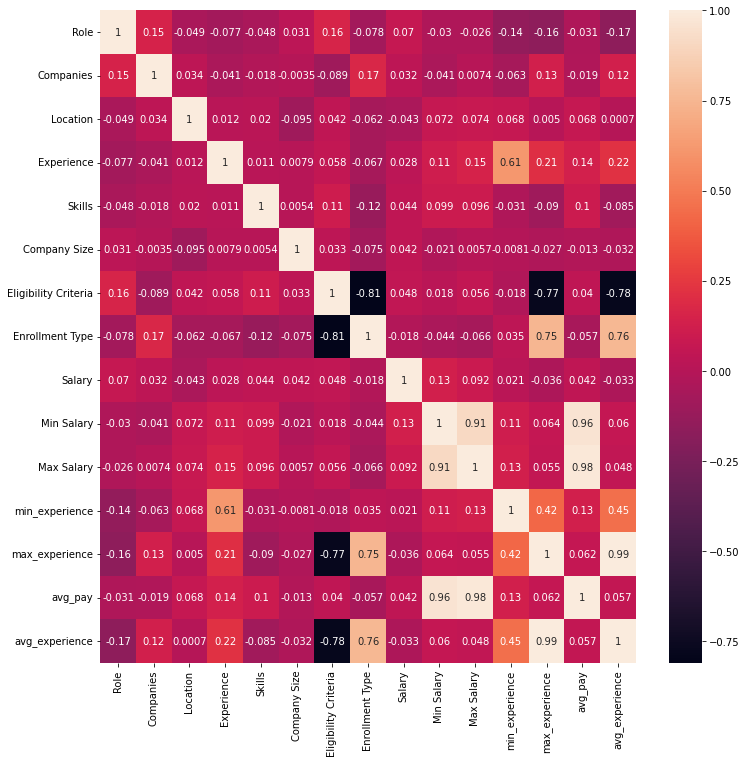

In [45]:
plt.figure(figsize=(12,12))
sns.heatmap(data1.corr(), annot=True)
plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler
features = ['Role','Companies','Location','Experience','Skills','Company Size','Eligibility Criteria','Enrollment Type','Salary','Min Salary','Max Salary','min_experience', 'max_experience']
# Separating out the features
x = data1.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [47]:
x

array([[-0.48789571, -1.56107667,  1.26138686, ...,  1.00867046,
        -0.62675575, -0.53453989],
       [ 1.13008322, -1.56107667,  0.76962343, ...,  1.92016856,
        -1.38197697, -0.92256885],
       [-0.48789571, -1.55004392, -0.70566688, ..., -1.31150652,
         0.88368668,  0.24151802],
       ...,
       [-0.48789571,  1.19710979,  1.71532234, ..., -0.31714496,
        -1.00436636, -1.31059781],
       [-0.48789571,  0.53514504, -0.32738732, ..., -1.39436999,
         0.12846546, -0.34052541],
       [-0.48789571, -0.2702454 , -0.40304323, ..., -0.73146228,
        -0.24914514, -0.92256885]])

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
data2

PC1       PC2       PC3       PC4       Pc5       PC6       PC7  \
0   -2.339172  1.099849  0.015592 -1.550508 -0.996291  1.733576 -1.779996   
1   -1.809408  1.184123 -2.534369 -0.868400 -0.690571  0.717295 -0.527785   
2    0.046031 -0.566156  2.648821 -0.871529 -0.274816  0.123376  1.386794   
3   -0.653603  1.004215 -0.387153 -0.713616  0.073530  1.655496  1.121099   
4    0.350237  3.362424  1.064613 -0.096668 -1.399472 -0.751140  1.023660   
..        ...       ...       ...       ...       ...       ...       ...   
383 -1.827956 -2.079166 -1.413653  1.196202 -0.495982 -1.091528 -0.831550   
384 -1.369588 -1.950927 -0.810415  0.350130 -1.442152 -0.298076 -0.762435   
385 -1.380150 -0.518556 -1.414233 -0.298659  1.388553 -0.577840  0.426819   
386 -0.338770 -1.686722  1.859352  0.429389  0.025826  1.261287 -1.146227   
387  0.112314 -1.024982  0.271030 -0.403016 -0.516616 -0.331690  0.631496   

          PC8       PC9      PC10      PC11      PC12      PC13  
0    1.514089  0.521632 -0.003322  4.540522 -0.355327  0.510121  
1    0.425332  1.789276  0.127310 -0.144995  0.096321  0.361641  
2   -0.971278  0.336805 -0.192527  0.159627  0.255527 -0.086853  
3   -1.453824  1.175886 -0.297474  0.202000  0.068768  0.189951  
4   -0.946445  0.603296  0.015425  0.137528 -0.013030 -1.109404  
..        ...       ...       ...       ...       ...       ...  
383 -0.410650 -0.507871  0.344393  0.025526 -0.363226 -0.182805  
384  0.585017 -1.298892  0.256194 -0.011740  0.007647 -0.234112  
385  1.984110 -1.085182  0.064534 -0.043268 -0.475305 -0.349723  
386  0.121919 -1.010496 -0.305538 -0.015456  0.021092 -0.057763  
387  0.011350 -0.223347 -0.642480  1.072938 -1.335755  0.301281  

[388 rows x 13 columns]

In [49]:
df_13=df.iloc[:,:13]
df_13.head(3)

Role                  Companies            Location  \
0             Data Scientist                      2Coms           New Delhi   
1  Machine Learning Engineer                      2Coms              Mumbai   
2             Data Scientist  2Coms Consulting Pvt Ltd.  Chennai, Bengaluru   

  Experience                                             Skills Company Size  \
0  2 - 7 Yrs  DataModeling\nEnterpriseApplications\nAnalytic...          838   
1    0-5 Yrs  Python\nComputerVision\nMachineLearning\nR\nBu...         4000   
2   6-11 Yrs  Machine Learning Code DataScience R Data Model...        10000   

  Eligibility Criteria Enrollment Type           Salary  Min Salary  \
0               B.Tech       Freelance  1000000-2000000     1000000   
1                   UG       Full Time  1800000-3300000     1800000   
2                  Phd       Full Time    160000-185000      160000   

   Max Salary  min_experience  max_experience  
0     2000000             2.0             7.0  
1     3300000             0.0             5.0  
2      185000             6.0            11.0

In [50]:

# correlation coefficient between original variables and the component

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_13.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

PC1       PC2       PC3       PC4       PC5  \
variable                                                                 
Role                 -0.141253 -0.086882 -0.183484  0.538233  0.323395   
Companies             0.100915 -0.079300 -0.214557  0.400634  0.499785   
Location             -0.011838  0.108678  0.021262 -0.351125  0.584428   
Experience            0.111012  0.349147  0.525118  0.214072  0.081992   
Skills               -0.101034  0.125703 -0.070313 -0.155941 -0.160660   
Company Size         -0.046862 -0.001460  0.022558  0.378795 -0.485202   
Eligibility Criteria -0.537216  0.129385  0.176226  0.067421  0.104622   
Enrollment Type       0.531798 -0.146377 -0.189772  0.014287 -0.022853   
Salary               -0.033414  0.122100 -0.126968  0.428180 -0.117559   
Min Salary            0.021724  0.572795 -0.380389 -0.053211 -0.046657   
Max Salary            0.011769  0.580440 -0.359949 -0.027504 -0.020092   
min_experience        0.210482  0.339904  0.528586  0.139006  0.090824   
max_experience        0.572326  0.055040  0.042347  0.043370  0.001144   

                           PC6       PC7       PC8       PC9      PC10  \
variable                                                                 
Role                  0.142810  0.028230 -0.237116  0.680495  0.033202   
Companies            -0.225058 -0.313502 -0.132885 -0.593599  0.030373   
Location             -0.129259 -0.248945  0.602656  0.270549 -0.083086   
Experience           -0.030789  0.002596 -0.137761 -0.002930 -0.717388   
Skills               -0.844720 -0.192157 -0.325977  0.246983  0.025745   
Company Size          0.056939 -0.678014  0.381981  0.080488 -0.010857   
Eligibility Criteria  0.020805 -0.000037 -0.036192 -0.121742  0.194399   
Enrollment Type      -0.030204  0.045207 -0.011247  0.102625 -0.106270   
Salary               -0.381922  0.578257  0.532832 -0.067978 -0.009053   
Min Salary            0.146515 -0.001263 -0.041622 -0.001638  0.011901   
Max Salary            0.153807 -0.063238 -0.065051 -0.044516 -0.012674   
min_experience       -0.016645  0.007947 -0.021219  0.038130  0.622911   
max_experience       -0.043537 -0.042700 -0.003864  0.102326  0.195340   

                          PC11      PC12      PC13  
variable                                            
Role                  0.051403 -0.015067  0.009647  
Companies             0.048792 -0.062808 -0.031627  
Location             -0.027226 -0.005935  0.000517  
Experience           -0.020158  0.033945 -0.036446  
Skills               -0.015763 -0.015311  0.005907  
Company Size         -0.047732 -0.016116 -0.019962  
Eligibility Criteria -0.554132  0.518216 -0.134708  
Enrollment Type      -0.786524 -0.124091 -0.009968  
Salary                0.025552  0.020583  0.027570  
Min Salary            0.024480 -0.141909 -0.691120  
Max Salary           -0.051494  0.106706  0.695816  
min_experience       -0.069347 -0.366478  0.061725  
max_experience        0.238553  0.737527 -0.111903

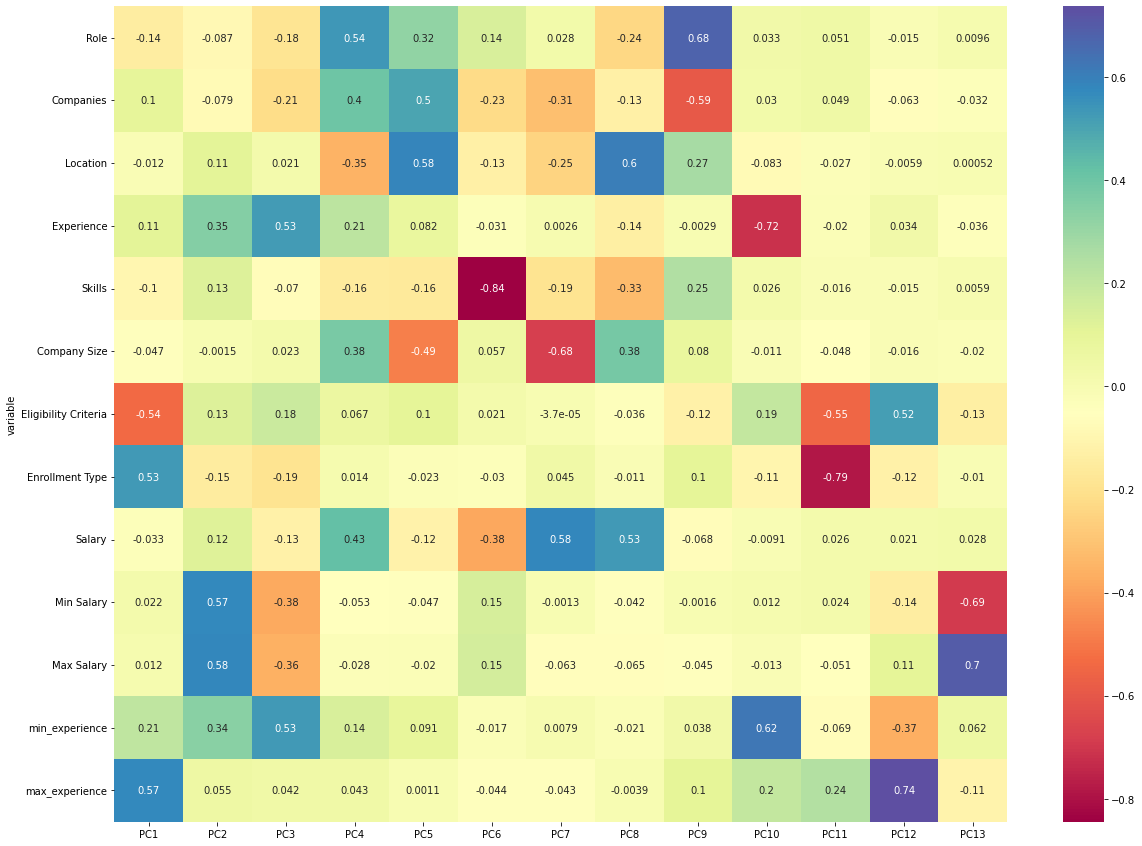

In [51]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [52]:
import plotly.express as px
features2 = ['Role','Companies','Location','Experience','Skills','Company Size','Eligibility Criteria','Enrollment Type','Salary','Min Salary','Max Salary','min_experience', 'max_experience' ]
y1 = data1.loc[:, features2].values
pca2 = PCA(n_components=2)
components = pca2.fit_transform(y1)
fig = px.scatter(components, x=0, y=1, color=1,labels={'0': 'PC1', '1': 'PC2'})
fig.show()

# Segment Extration

<AxesSubplot:>

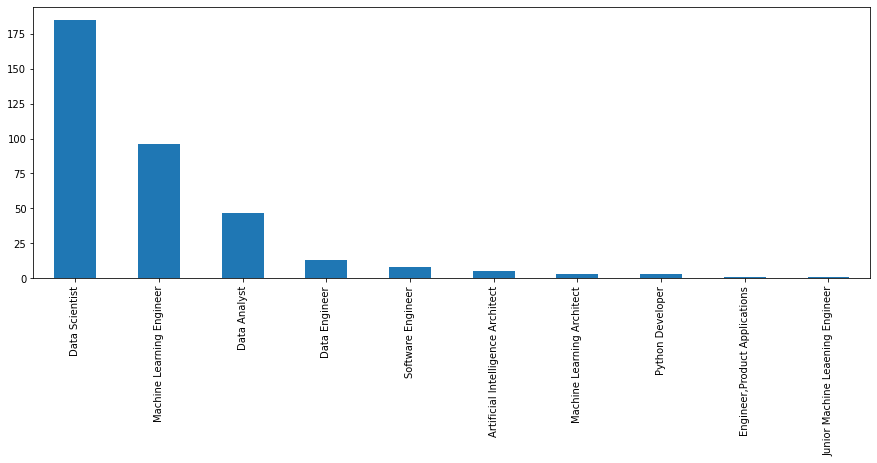

In [53]:
f,ax=plt.subplots(figsize=(15,5))
df['Role'].value_counts().head(10).plot(kind = 'bar')

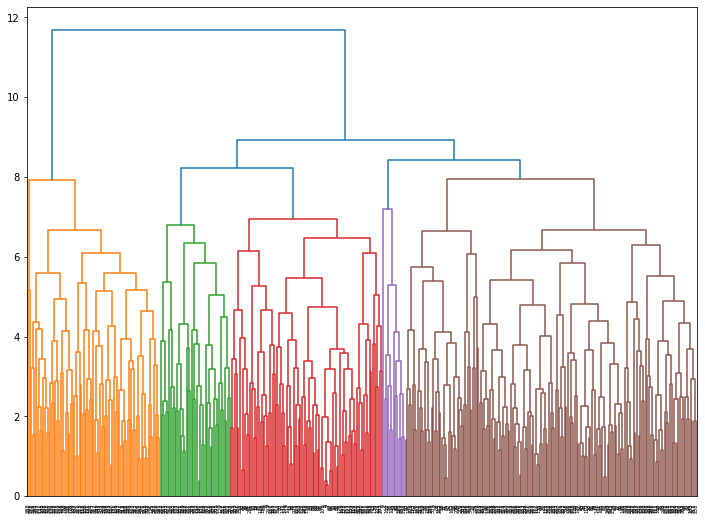

In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(data2, 'complete')

#labelList = range(1, 11)

plt.figure(figsize=(12, 9))
dendrogram(linked, orientation='top')
plt.show()

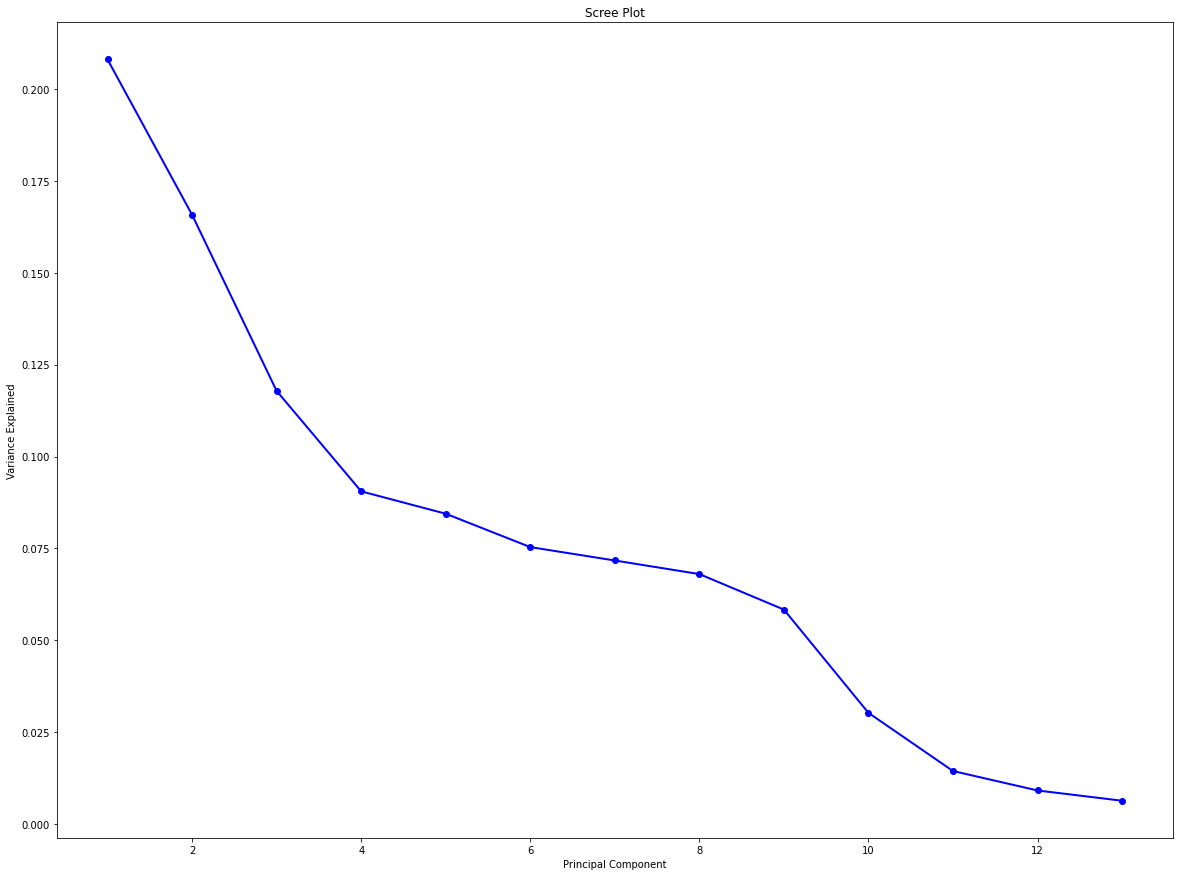

In [55]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [56]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

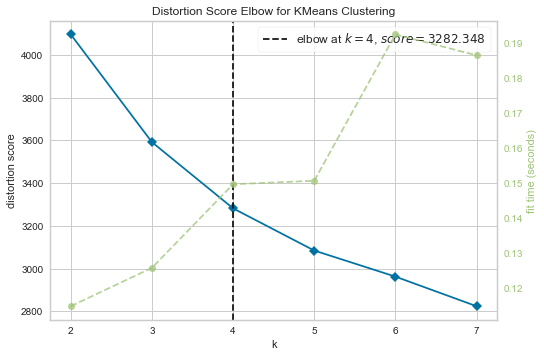

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,8))
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [58]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster. 

[0 0 2 0 0 0 0 0 3 3 3 3 3 0 0 3 3 2 3 3 3 3 0 0 0 3 3 2 0 0 2 0 3 3 2 2 3
 3 2 0 2 3 0 0 3 3 3 2 3 3 3 3 1 3 3 0 2 2 0 3 3 3 3 2 0 3 1 0 0 0 3 2 0 3
 3 2 2 0 3 0 2 0 0 0 2 3 0 0 2 3 3 0 0 3 3 3 2 0 3 1 0 3 0 3 0 0 1 3 1 1 3
 2 3 2 1 2 3 3 1 0 3 1 0 3 1 1 2 0 3 0 1 1 1 3 3 3 1 3 1 0 0 0 0 1 0 3 0 3
 3 2 2 1 2 1 0 2 3 1 3 2 1 0 2 0 1 2 1 1 0 0 1 3 1 0 2 0 0 0 0 0 1 3 3 3 2
 0 3 2 1 3 0 3 0 1 0 0 1 1 1 3 2 3 2 0 3 3 0 1 3 3 3 3 0 1 3 2 1 3 3 2 0 3
 3 2 1 1 3 1 3 2 3 2 1 0 0 0 0 1 1 2 1 0 2 1 2 3 1 3 3 3 3 0 3 3 3 3 3 1 3
 3 1 2 0 1 0 0 1 3 3 1 0 1 3 1 1 3 0 3 3 1 0 3 3 1 3 1 1 0 3 2 0 0 3 0 2 3
 3 0 2 1 1 1 0 2 1 3 2 1 2 2 3 1 3 1 1 3 1 1 1 1 1 1 0 0 3 0 3 3 1 0 0 3 1
 3 0 2 3 1 3 2 0 2 3 1 1 1 2 1 3 1 3 3 3 0 0 3 3 3 0 1 3 3 0 3 2 3 2 1 0 3
 0 3 3 3 3 2 1 3 2 2 3 2 2 3 3 3 2 3]
3282.34776032225
16
[[-5.71390146e-01  1.59004736e+00 -3.44375540e-01 -5.30303486e-01
   6.38179232e-02  4.72918160e-01 -3.93963520e-01 -5.02920103e-01
   5.01982533e-02 -4.41703147e-04  3.23807614e-03 -1.3456636

In [59]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 100, 2: 63, 3: 144, 1: 81})

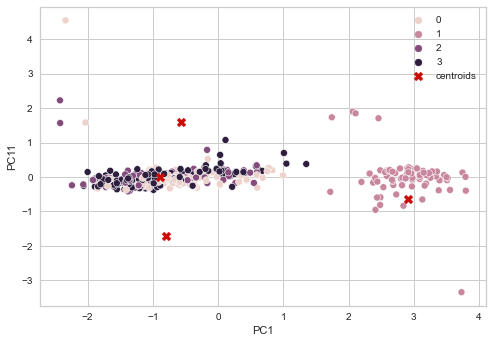

In [60]:
#Visulazing clusters
sns.scatterplot(data=data2, x="PC1", y="PC11", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [61]:
X=data2[['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7','PC8','PC12','PC13']]
y=df['avg_pay']

In [62]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=101)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lm=LinearRegression().fit(X_train,y_train)

In [66]:
print(lm.intercept_)

1062103.492503129


In [67]:
lm.coef_

array([   7431.0672536 ,  474331.36590195, -286981.39109789,
        -13968.06281638,  -43870.4249276 ,  119225.74286142,
       -100401.94058832,  -87841.72662398,    -555.99936485,
        520872.68182446])

In [68]:
X_train.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'Pc5', 'PC6', 'PC7', 'PC8', 'PC12', 'PC13'], dtype='object')

In [69]:
cdf=pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [70]:
cdf

Coeff
PC1     7431.067254
PC2   474331.365902
PC3  -286981.391098
PC4   -13968.062816
Pc5   -43870.424928
PC6   119225.742861
PC7  -100401.940588
PC8   -87841.726624
PC12    -555.999365
PC13  520872.681824

In [71]:
predictions=lm.predict(X_test)

In [72]:
predictions

array([ -77949.74941576, 2367891.15125972, 1696211.03553549,
       1057607.66615051,  564345.80768427,  768178.74968593,
       1255198.75613922,  539710.23409319, 1274100.43540914,
        727392.66848215, -233217.48057607, 1043014.48993636,
       2304659.09956465, 1491751.80060775,  651622.53502595,
        897664.39846027, 2007639.5479186 ,  751072.83871773,
        -30624.14533142, 2511917.08911278, 1411573.94660737,
         26837.77151908, 2022292.7185022 , 1769346.59056307,
       2713328.02378867, 1907087.35461719, 1496741.74805027,
        481894.0147082 , 1458075.65663217, 2020552.74920871,
        992490.55203527,  845933.15652458, 1520340.76160386,
       1860134.51003768, 1796629.58107776, 1109885.59534122,
       1752628.3477296 , 1821163.67848472,  722632.58768416,
       1935835.52446964, 2038069.99936465,  974008.41185804,
         34107.64096747,  473988.19053134, 1078432.83265754,
       1263123.88704859,  758254.50541407,  495241.80966519,
        571253.19688943,

In [73]:
y_test

38           0.0
178    2550000.0
160    1600000.0
98      850000.0
117     700000.0
         ...    
188    1400000.0
170          0.0
20      575000.0
119    1500000.0
167    1500000.0
Name: avg_pay, Length: 156, dtype: float64

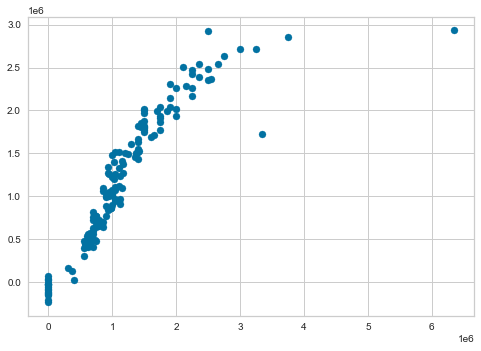

In [74]:
plt.scatter(y_test, predictions)

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='avg_pay', ylabel='Density'>

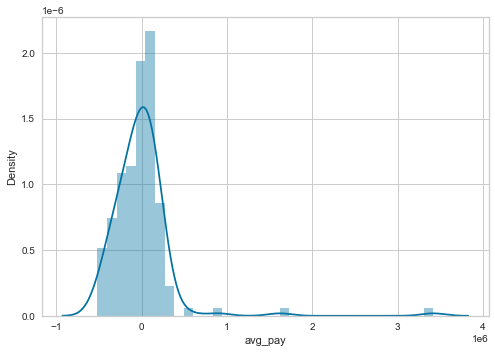

In [75]:
#Residual histogram plot
sns.distplot((y_test-predictions))

In [76]:
from sklearn import metrics

In [77]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 201230.138299248
MSE: 139676329473.78204
RMSE: 373732.96546301886


In [78]:
metrics.mean_absolute_error(y_test,predictions)

201230.138299248

In [79]:
metrics.mean_squared_error(y_test,predictions)

139676329473.78204

In [80]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

373732.96546301886